In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to Pandas. Part IV

Contents

- [Applying a function to a pandas Series or DataFrame](#1.-Applying-a-function-to-a-pandas-Series-or-DataFrame)
- [Using groupby](#2.-Using-groupby)
- [Unstacking](#3.-Unstacking)
- [Pivot tables and cross tabulations](#4.-Pivot-tables-and-cross-tabulations)
- [Rolling and resampling](#5.-Resampling-and-rolling)

## 1. Applying a function to a pandas Series or DataFrame

- [The map method](#1.1.-The-map-method)
- [The apply method](#1.2.-The-apply-method)
- [The applymap method](#1.3.-The-applymap-method)

In [2]:
url = "https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/titanic.csv"
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.1. The map method

map is a Series method.

map allows you to map an existing value of a series to a different set of values.

In [3]:
my_map = {'female':1,'male':0}
my_map

{'female': 1, 'male': 0}

In [4]:
# map 'female' to 0 and 'male' to 1
titanic['Sex_num'] = titanic.Sex.map(my_map)

In [5]:
titanic.Sex_num

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_num, Length: 891, dtype: int64

In [6]:
titanic.loc[0:4,['Sex','Sex_num']]

,Sex,Sex_num
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


### 1.2. The apply method

apply is both a Series method and a DataFrame method

- [Apply as a Series method](#1.2.1.-Apply-as-a-Series-method)
- [Apply as a DataFrame method](#1.2.2.-Apply-as-a-DataFrame-method)

#### 1.2.1. Apply as a Series method

apply applies a function to each element of the Series

**Remark:** **map** can be substituted for **apply** in many cases, but **apply** is more flexible and thus is recommended

**Example 1:** calculate the length of the strings in the 'Name' column

In [7]:
titanic['Name_length'] = titanic.Name.apply(len) # apply Python len function

In [8]:
titanic.loc[0:4,['Name','Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [9]:
titanic.Name.map(len)

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

**Example 2:** round up each element in the 'Fare' Series to the next integer

In [10]:
import numpy as np
titanic['Fare_ceil'] = titanic.Fare.apply(np.ceil) # apply Numpy ceiling function

In [11]:
titanic.loc[0:4,['Fare','Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


**Example 3:** Extract the last name of each person into its own column

In [12]:
def get_last_name(x):
    return x.split(',')[0]

In [13]:
titanic['Last_name'] = titanic.Name.apply(get_last_name)

In [14]:
titanic.loc[0:4,['Name','Last_name']]

,Name,Last_name
0,"Braund, Mr. Owen Harris",Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,"Heikkinen, Miss. Laina",Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,"Allen, Mr. William Henry",Allen


In [15]:
titanic.Name.map(get_last_name)

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [16]:
# alternatively, use a lambda function
titanic['Last_name'] = titanic.Name.apply(lambda x:x.split(',')[0])

In [17]:
titanic.loc[0:4,['Name','Last_name']]

,Name,Last_name
0,"Braund, Mr. Owen Harris",Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,"Heikkinen, Miss. Laina",Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,"Allen, Mr. William Henry",Allen


#### 1.2.2. Apply as a DataFrame method

apply applies a function along either axis of the DataFrame

In [18]:
# read a dataset of alcohol consumption into a DataFrame
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/drinks.csv'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [19]:
# select a subset of the DataFrame to work with
sub_drinks = drinks.loc[:,'beer_servings':'wine_servings']
sub_drinks.head()

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [20]:
# apply the 'max' function along axis 0 to calculate the maximum value in each column
sub_drinks.apply(max, axis=0) # Python max function along rows

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [21]:
# apply the 'max' function along axis 1 to calculate the maximum value in each row
sub_drinks.apply(max, axis=1) # Python max function along columns

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [22]:
# use 'np.argmax' to calculate which column has the maximum value for each row
sub_drinks.apply(np.argmax,axis=1)

0      0
1      1
2      0
3      2
4      0
      ..
188    0
189    0
190    0
191    0
192    0
Length: 193, dtype: int64

In [23]:
'if you want to know in which column is the maximum'
sub_drinks.apply(np.argmax,axis=1).map({0:'beer_servings',
                                        1:'spirit_servings',
                                        2:'wine_servings'})

0        beer_servings
1      spirit_servings
2        beer_servings
3        wine_servings
4        beer_servings
            ...       
188      beer_servings
189      beer_servings
190      beer_servings
191      beer_servings
192      beer_servings
Length: 193, dtype: object

### 1.3. The applymap method

applymap is a DataFrame method. It applies a function to everyelement of the DataFrame

In [24]:
sub_drinks.head(5)

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [25]:
# convert every DataFrame element into a float
sub_drinks.applymap(float).head(5)

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [26]:
# overwrite the existing DataFrame columns
sub_drinks.loc[:, 'beer_servings':'wine_servings'] = sub_drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
sub_drinks.head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


## 2. Using groupby

In [27]:
# reload the drinks dataset
drinks = pd.read_csv('https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [28]:
# calculate the average beer servings across the entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [29]:
# calculate the average beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [30]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

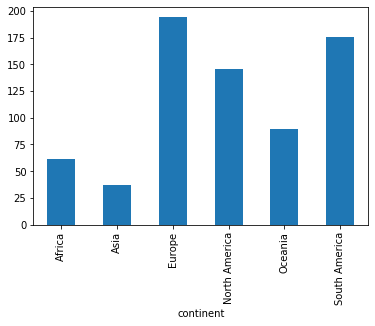

In [31]:
# bar plot of the above DataFrame 
drinks.groupby('continent').beer_servings.mean().plot(kind='bar')

In [32]:
# other aggregation functions (such as 'max','min','count','std', etc) can also be used with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [33]:
# you can use your own aggregation function
def peak_to_peak(group):
    return group.max()-group.min()
drinks.groupby('continent').beer_servings.apply(peak_to_peak)

continent
Africa           376
Asia             247
Europe           361
North America    284
Oceania          306
South America    240
Name: beer_servings, dtype: int64

In [34]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max','std'])

,count,mean,min,max,std
continent,,,,,
Africa,53,61.471698,0,376,80.557816
Asia,44,37.045455,0,247,49.469725
Europe,45,193.777778,0,361,99.631569
North America,23,145.434783,1,285,79.621163
Oceania,16,89.687500,0,306,96.641412
South America,12,175.083333,93,333,65.242845


In [35]:
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max','std',peak_to_peak])

,count,mean,min,max,std,peak_to_peak
continent,,,,,,
Africa,53,61.471698,0,376,80.557816,376
Asia,44,37.045455,0,247,49.469725,247
Europe,45,193.777778,0,361,99.631569,361
North America,23,145.434783,1,285,79.621163,284
Oceania,16,89.687500,0,306,96.641412,306
South America,12,175.083333,93,333,65.242845,240


In [36]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


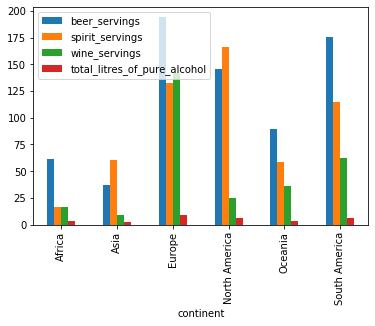

In [37]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

## 3. Unstacking

In [38]:
# load tips dataset
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/tips.csv'
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [39]:
# add tip percentage of total bill
tips['tip_pct'] = 100*tips.tip/tips.total_bill
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765


In [40]:
# aggregate tip_pct by day and smoker
tips.groupby(['day','smoker']).tip_pct.mean() # DataFrame with a multi-index

day   smoker
Fri   No        15.165044
      Yes       17.478305
Sat   No        15.804766
      Yes       14.790607
Sun   No        16.011294
      Yes       18.725032
Thur  No        16.029808
      Yes       16.386327
Name: tip_pct, dtype: float64

In [41]:
tips.groupby(['day','smoker']).tip_pct.mean().unstack(level=1)

smoker,No,Yes
day,,
Fri,15.165044,17.478305
Sat,15.804766,14.790607
Sun,16.011294,18.725032
Thur,16.029808,16.386327


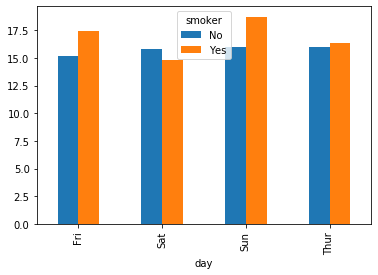

In [42]:
tips.groupby(['day','smoker']).tip_pct.mean().unstack(level=1).plot(kind='bar')

In [43]:
tips.groupby(['day','smoker']).tip_pct.mean().unstack(level=0)

day,Fri,Sat,Sun,Thur
smoker,,,,
No,15.165044,15.804766,16.011294,16.029808
Yes,17.478305,14.790607,18.725032,16.386327


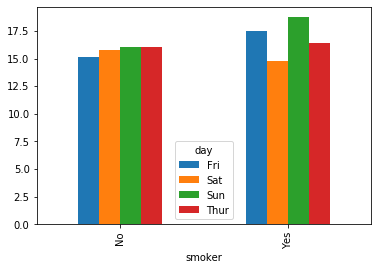

In [44]:
tips.groupby(['day','smoker']).tip_pct.mean().unstack(level=0).plot(kind='bar')

## 4. Pivot tables and cross-tabulations

- [Pivot tables](#4.1.-Pivot-tables)
- [Cross-Tabulations](#4.2.-Cross-Tabulations)

### 4.1. Pivot tables

A *pivot table* is a data summarization tool.
It aggregates a table of data by one or more keys, arranging the data in a rectangle.

In [45]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765


Aggregate 'tip_pct' by columns 'day' and 'smoker':

In [46]:
# using groupby
tips.groupby(['day','smoker']).tip_pct.mean()

day   smoker
Fri   No        15.165044
      Yes       17.478305
Sat   No        15.804766
      Yes       14.790607
Sun   No        16.011294
      Yes       18.725032
Thur  No        16.029808
      Yes       16.386327
Name: tip_pct, dtype: float64

In [47]:
# using pivot_table
tips.pivot_table('tip_pct', index='day', columns = 'smoker', aggfunc='mean') # default aggregation function = mean

smoker,No,Yes
day,,
Fri,15.165044,17.478305
Sat,15.804766,14.790607
Sun,16.011294,18.725032
Thur,16.029808,16.386327


In [48]:
tips.pivot_table('tip_pct', index='day', columns = 'smoker') 

smoker,No,Yes
day,,
Fri,15.165044,17.478305
Sat,15.804766,14.790607
Sun,16.011294,18.725032
Thur,16.029808,16.386327


Aggregate 'tip_pct' and 'size' by 'time', 'day' and 'smoker'

In [49]:
# using groupby
tips.groupby(['time','day','smoker'])[['tip_pct','size']].mean()

tip_pct      size
time   day  smoker                     
Dinner Fri  No      13.962237  2.000000
            Yes     16.534736  2.222222
       Sat  No      15.804766  2.555556
            Yes     14.790607  2.476190
       Sun  No      16.011294  2.929825
            Yes     18.725032  2.578947
       Thur No      15.974441  2.000000
Lunch  Fri  No      18.773467  3.000000
            Yes     18.893659  1.833333
       Thur No      16.031067  2.500000
            Yes     16.386327  2.352941

In [50]:
# using pivot_table (arranging 'time' and 'day' on the rows)
tips.pivot_table(['tip_pct','size'], index=['time','day'], columns = 'smoker', aggfunc='mean')

size              tip_pct           
smoker             No       Yes         No        Yes
time   day                                           
Dinner Fri   2.000000  2.222222  13.962237  16.534736
       Sat   2.555556  2.476190  15.804766  14.790607
       Sun   2.929825  2.578947  16.011294  18.725032
       Thur  2.000000       NaN  15.974441        NaN
Lunch  Fri   3.000000  1.833333  18.773467  18.893659
       Thur  2.500000  2.352941  16.031067  16.386327

In [51]:
# use 'count' as the aggregation function
tips.pivot_table(['tip_pct'], index=['time','day'], columns = 'smoker', aggfunc='count') 

tip_pct      
smoker           No   Yes
time   day               
Dinner Fri      3.0   9.0
       Sat     45.0  42.0
       Sun     57.0  19.0
       Thur     1.0   NaN
Lunch  Fri      1.0   6.0
       Thur    44.0  17.0

In [52]:
tips.pivot_table(['tip_pct'], index=['time','day'], columns = 'smoker', aggfunc=len, fill_value=0)

tip_pct    
smoker           No Yes
time   day             
Dinner Fri        3   9
       Sat       45  42
       Sun       57  19
       Thur       1   0
Lunch  Fri        1   6
       Thur      44  17

We can augment this table to include partial totals by passing margins=True

In [53]:
tips.pivot_table('tip_pct', index=['time','day'], columns = 'smoker', aggfunc='count', fill_value=0, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [54]:
tips.pivot_table('tip_pct',index='day',columns = 'smoker', aggfunc='count', margins=True)

smoker,No,Yes,All
day,,,
Fri,4,15,19
Sat,45,42,87
Sun,57,19,76
Thur,45,17,62
All,151,93,244


### 4.2. Cross-Tabulations

A *cross-tabulation* is a special case of pivot table that computes frequencies.

In [55]:
pd.crosstab(index=tips.day, columns = tips.smoker)

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


In [56]:
pd.crosstab(index=tips.day,columns=tips.smoker,margins=True)

smoker,No,Yes,All
day,,,
Fri,4,15,19
Sat,45,42,87
Sun,57,19,76
Thur,45,17,62
All,151,93,244


In [57]:
pd.crosstab(index=tips.day, columns = tips.smoker, normalize='index')

smoker,No,Yes
day,,
Fri,0.210526,0.789474
Sat,0.517241,0.482759
Sun,0.750000,0.250000
Thur,0.725806,0.274194


In [58]:
pd.crosstab(index=tips.day, columns = tips.smoker, normalize='columns')

smoker,No,Yes
day,,
Fri,0.026490,0.161290
Sat,0.298013,0.451613
Sun,0.377483,0.204301
Thur,0.298013,0.182796


In [59]:
pd.crosstab(index=[tips.time,tips.day], columns = tips.smoker,  normalize='index')

smoker             No       Yes
time   day                     
Dinner Fri   0.250000  0.750000
       Sat   0.517241  0.482759
       Sun   0.750000  0.250000
       Thur  1.000000  0.000000
Lunch  Fri   0.142857  0.857143
       Thur  0.721311  0.278689

## 5. Resampling and rolling

 - [Resampling](#5.1.-Resampling)
 - [Rolling](#5.2.-Rolling)

Let us take a look at bicycle counts on Seattle's Fremont Bridge

In [60]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/Fremont.csv'
fremont = pd.read_csv(url)
fremont.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


The Fremont Bridge Bicycle Counter began operation in October 2012 and records the number of bikes that cross the bridge using the pedestrian/bicycle pathways.
The bicycle counter has sensors on the east and west sidewalks of the bridge.

<table><tr>
<td> <img src="fremont.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="fremont2.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

In [61]:
fremont['Date'] = pd.to_datetime(fremont.Date)

In [62]:
fremont.set_index('Date', inplace=True)

In [63]:
fremont.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [64]:
# Better way:
fremont = pd.read_csv(url, index_col='Date', parse_dates=True)
fremont.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


For convenience, we'll further process this dataset by shortening the column names:

In [65]:
fremont.columns = ['Total', 'East', 'West']

In [66]:
fremont.columns

Index(['Total', 'East', 'West'], dtype='object')

Let's plot the raw data:

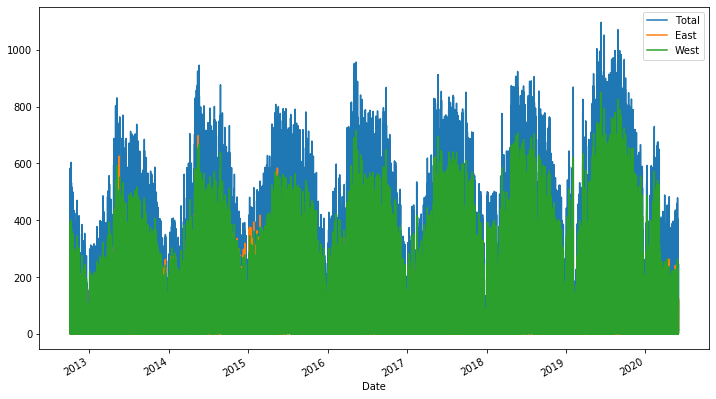

In [67]:
fremont.plot(figsize=(12,7)) 

The ~25,000 hourly samples are far too dense for use to make much sense of.
We can gain more insight by *resampling* the data to a courser grid.

### 5.1. Resampling

Resampling refers to the process of converting a time series from one frequency to another. 

Text(0.5, 1.0, 'Daily bicycle count')

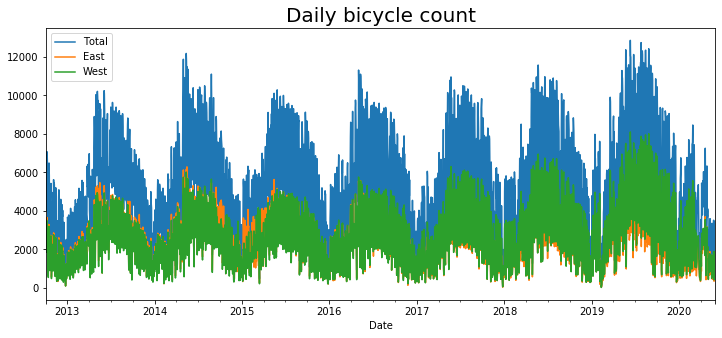

In [68]:
# resample by day
fremont.resample('D').sum().plot(figsize = (12,5)) # D = dayly
plt.title('Daily bicycle count',fontsize=20)

Text(0.5, 1.0, 'Weekly bicycle count')

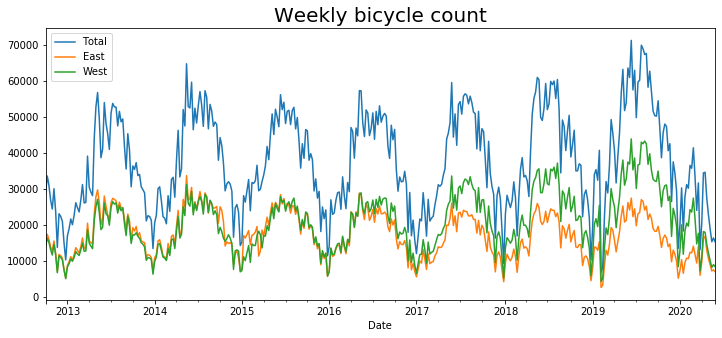

In [69]:
# resample by week
fremont.resample('W').sum().plot(figsize=(12,5)) # W : weekly
plt.title('Weekly bicycle count',fontsize=20)

This shows us some interesting seasonal trends: people bicycle more in the summer than in the winter.

### 5.2 Rolling

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends

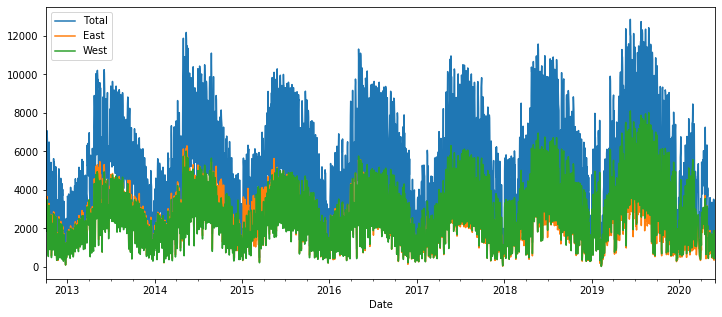

In [70]:
fremont.resample('D').sum().plot(figsize=(12,5)) # data is very spiky

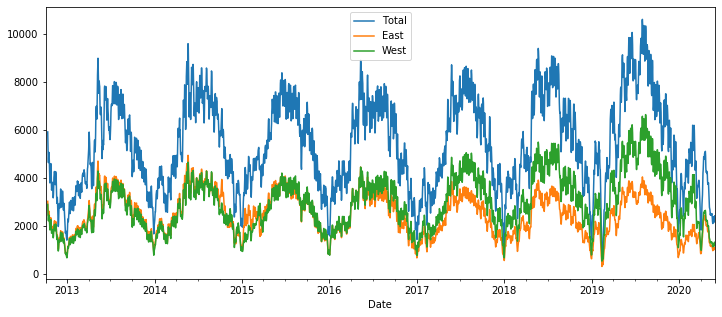

In [71]:
fremont.resample('D').sum().rolling(10).mean().plot(figsize=(12,5)) 

The expression 'rolling(10)' creates an object that enables grouping over a 10-day sliding window.
So here we have the 10-day moving window average of Fremont traffic.

**Bonus: digging into the data**

While the smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.

Let's plot the hourly counts of each day

In [72]:
pivoted = fremont.pivot_table('Total', index=fremont.index.time, columns = fremont.index.date)
pivoted.head()

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,3.0,5.0,6.0,4.0,7.0,2.0,5.0,7.0,11.0,1.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,3.0,1.0,4.0,2.0,2.0,0.0,1.0,4.0,6.0,1.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,0.0,8.0,1.0,3.0,0.0,2.0,5.0,2.0,5.0,0.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,1.0,2.0,0.0,3.0,1.0,5.0,2.0,2.0,4.0,0.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,4.0,2.0,1.0,5.0,3.0,4.0,7.0,4.0,5.0,0.0


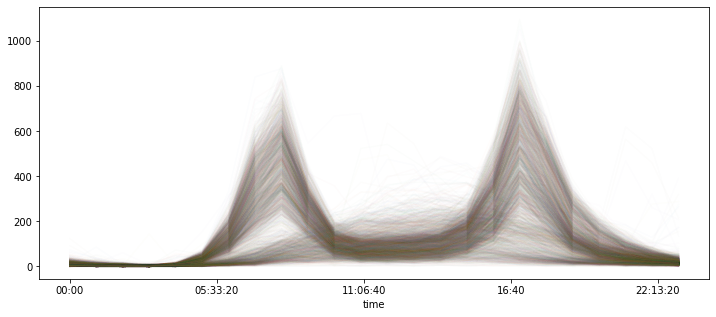

In [73]:
pivoted.plot(legend=False,alpha=0.01, figsize=(12,5))

We can see two trends: One trend that peaks in the morning and in the evening (weekday trend?), and another trend that peaks at noon (weekend trend?).

Let us plot the total count by day of the week.

In [74]:
pivoted_daily = fremont.pivot_table('Total', index = fremont.index.time, columns = fremont.index.dayofweek)
pivoted_daily.head()

Date,0,1,2,3,4,5,6
00:00:00,7.127364,8.774275,9.252513,9.998742,12.455919,16.988665,15.030227
01:00:00,3.393443,4.162673,4.786432,4.939623,6.308564,9.948363,8.658690
02:00:00,2.370744,3.162673,3.208543,3.421384,3.547859,6.375315,5.713188
03:00:00,2.303909,2.625473,2.832915,2.835220,2.901763,3.584383,3.347607
04:00:00,7.283733,7.779319,8.224874,7.412579,7.185139,4.311083,3.420655


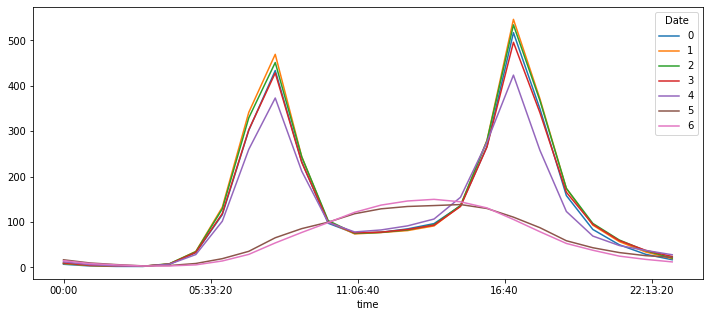

In [75]:
pivoted_daily.plot(figsize=(12,5))

This shows a strong distinction between weekday and weekend totals